# IFT 6758 - Devoir 3 

### Pt 2. Classement d'éches
**Comparaison des groupes sur/sous-représentés**

Evaluation de ce notebook :

- Graphiques pour les distributions de scores et d'écarts
- Résultats imprimés des tests de permutation
- Réponses courtes (dernière section)


In [80]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [82]:
import chess_rating

## 1. Chargez les données

### 1.1 Lire les données XML

In [83]:
xml_path = Path("data/standard_oct22frl_xml.xml")  # shouldn't need to change this

In [84]:
# TODO: Complétez cette méthode dans chess_ratings.py
raw_df = chess_rating.parse_xml(xml_path)

                            name rating sex birthday country  flag title
0                     A C J John   1063   M     1987     IND     i  None
1                 A Chakravarthy   1151   M     1986     IND     i  None
2               A E M, Doshtagir   1840   M     1974     BAN     i  None
3       A hamed Ashraf, Abdallah   1728   M     2001     EGY     i  None
4                A Hamid, Harman   1325   M     1970     MAS     i  None
...                          ...    ...  ..      ...     ...   ...   ...
398377               Zyto, Karol   1616   M     2006     POL  None  None
398378            Zyubin, Sergey   1884   M     1975     RUS     i  None
398379             Zyuzev, Pavel   1856   M     1993     RUS     i  None
398380            Zywert, Kacper   1519   M     1999     POL  None  None
398381       Zyznowska, Marianna   1150   F     2004     POL    wi  None

[398382 rows x 7 columns]


In [85]:
# Vérifiez pour voir un échantillon de 5 joueurs
random.seed(0)
raw_df.sample(5)

,name,rating,sex,birthday,country,flag,title
42279,"Bistriceanu, Traian",1423,M,2004,ROU,i,None
370989,"Varaljai, Attila",2214,M,1962,HUN,i,None
131848,"Gunin, Pavel",2186,M,1986,RUS,i,None
194986,"Le Corronc, Alan",1263,M,2007,FRA,None,None
88303,"Dolmer, William",1165,M,2004,CAN,None,None


In [86]:
# Vérifiez pour voir les dtypes du dataframe brut
raw_df.dtypes

name        object
rating      object
sex         object
birthday    object
country     object
flag        object
title       object
dtype: object

In [87]:
# Voir il y a combien de dates de naissance manquantes
raw_df.birthday.isnull().sum()

np.int64(8477)

### 1.2 Nettoyez les données

Nous voulons que les anniversaires (année de naissance) et le score (Elo) soient convertis en nombres entiers afin que nous puissions faire des opérations numériques/logiques avec eux (par exemple, moins que, plus grand que, etc.). Complétez la méthode `clean_data()` dans `chess_rating.py`

In [88]:
# TODO: Complétez cette méthode dans chess_ratings.py
df = chess_rating.clean_data(raw_df, 2002)

/Users/mattbread/Documents/UDEM/Intro_Data/hw3/chess_rating.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].apply(pd.to_numeric)
/Users/mattbread/Documents/UDEM/Intro_Data/hw3/chess_rating.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birthday'] = df['birthday'].apply(pd.to_numeric)


In [89]:
np.random.seed(0)
df.sample(5)

,name,rating,sex,birthday,country,flag,title
206801,"Lutzen, Mads",1542,M,2000,DEN,i,None
296314,"Rieckers, Dirk",1397,M,1964,GER,i,None
120235,"Gil, Celsio",1752,M,1999,STP,i,None
147860,"Hurwitz, Ed J G",2023,M,1964,ENG,i,None
124743,"Gonzalez Gomez, Pedro Daniel",1539,M,1997,ESP,None,None


In [90]:
df.dtypes

name        object
rating       int64
sex         object
birthday     int64
country     object
flag        object
title       object
dtype: object

In [91]:
df.birthday.isnull().sum()

np.int64(0)

## 2. Histogrammes des scores Elo

Nous voulons d'abord comparer la distribution des scores pour les joueurs masculins et féminins.
Étant donné que les données sont assez fines, nous devrons regrouper les notes.
Complétez `bin_counts()`, qui devrait gérer le binning pour les données arbitraires et le choix des bacs.
En plus de renvoyer les décomptes bruts, renvoyez également les décomptes normalisés dans la trame de données (`"count_norm"`).

### 2.1 Binning data

Voici quelques entrées de test pour vous aider à valider votre implémentation :

In [92]:
# sample inputs to help test your method
x = pd.DataFrame({'rating': [1, 2, 4, 6, 6, 7, 8, 11] })
bins = [0, 5, 10, 15]
bin_centers = [2.5, 7.5, 12.5]

# Output attendu
solution = pd.DataFrame({
    'rating': {0: 7.5, 1: 2.5, 2: 12.5},
     'count': {0: 4, 1: 3, 2: 1},
     'count_norm': {0: 0.5, 1: 0.375, 2: 0.125}
})
print(solution)

   rating  count  count_norm
0     7.5      4       0.500
1     2.5      3       0.375
2    12.5      1       0.125


In [94]:
binned_output = chess_rating.bin_counts(x, bins, bin_centers)
binned_output

,rating,count,count_norm
0,7.5,4,0.500
1,2.5,3,0.375
2,12.5,1,0.125


In [95]:
solution.eq(binned_output)

,rating,count,count_norm
0,True,True,True
1,True,True,True
2,True,True,True


Utilisons cette méthode pour bin les scores M/F et les comparer.

In [96]:
# TODO: Spécifiez les bin counts 
bins = np.arange(1000, 2950, 50)
bin_centers = bins[:-1] + 25
print(bin_centers)

[1025 1075 1125 1175 1225 1275 1325 1375 1425 1475 1525 1575 1625 1675
 1725 1775 1825 1875 1925 1975 2025 2075 2125 2175 2225 2275 2325 2375
 2425 2475 2525 2575 2625 2675 2725 2775 2825 2875]


In [97]:
# Générez les données d'histogramme  
# TODO: completez chess_rating.bin_counts()
M_hist = chess_rating.bin_counts(df.query("sex=='M'"), bins=bins, bin_centers=bin_centers)
F_hist = chess_rating.bin_counts(df.query("sex=='F'"), bins=bins, bin_centers=bin_centers)

M_hist['sex'] = 'M'
F_hist['sex'] = 'F'

hist = pd.concat([M_hist, F_hist])

/Users/mattbread/Documents/UDEM/Intro_Data/hw3/chess_rating.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(pd.cut(df['rating'], bins=bins, right=False, labels=bin_centers))
/Users/mattbread/Documents/UDEM/Intro_Data/hw3/chess_rating.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(pd.cut(df['rating'], bins=bins, right=False, labels=bin_centers))


À l'aide des données regroupées, tracez deux graphiques linéaires des données regroupées côte à côte; l'un contenant les décomptes bruts (`"count"`), et l'autre contenant les décomptes normalisés (`"count_norm"`), et M/F doit être de deux couleurs différentes.

<Axes: xlabel='rating', ylabel='count_norm'>

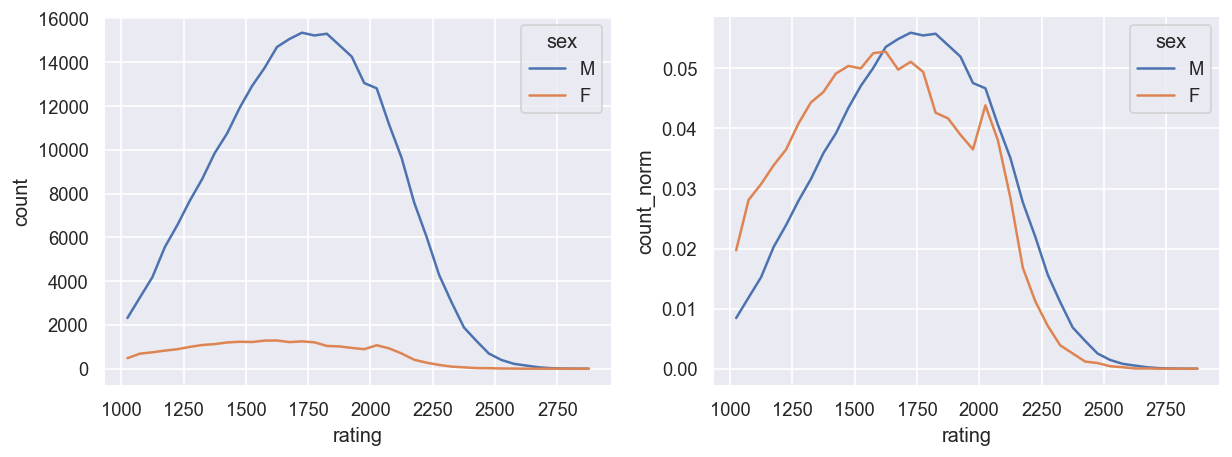

In [98]:
# Now draw the two histograms side-by-side. 
fig, ax = plt.subplots(1,2, figsize=(12, 4), dpi=120)
sns.lineplot(data=hist, x="rating", y="count", hue='sex', ax=ax[0])
sns.lineplot(data=hist, x="rating", y="count_norm", hue='sex', ax=ax[1])

## 3. Tests de Permutation

Nous allons maintenant effectuer les tests de permutation comme indiqué dans l'expérience de pensée de l'introduction.
Prenez l'ensemble de données nettoyé complet (hommes et femmes) et échantillonnez au hasard deux groupes sans remplacement (c'est-à-dire mélangez les joueurs).
La taille des groupes doit refléter la différence du monde réel que nous souhaitons étudier, c'est-à-dire la taille du groupe masculin et féminin.
Terminez `chess_rating.PermutationTests.job()`, qui implémente la partie échantillonnage de cette expérience, et renvoie la valeur maximale des groupes surreprésentés et sous-représentés respectivement.

Ensuite, complétez la méthode `chess_rating.sample_two_groups()`, qui exécute cette expérience `n_iter` fois.
Une fois terminé, exécutez cette expérience dans le bloc-notes avec au moins `n_iter=1000`.
Exécutez la cellule qui imprime la différence moyenne obtenue à partir des tests de permutation, ainsi que les différences réelles.

In [119]:
n_overrep = len(df[df['sex'] == 'M'])
n_underrep = len(df[df['sex'] == 'F'])


over, under = chess_rating.sample_two_groups(df, n_overrep, n_underrep, n_iter=1000)

100%|█████████████████████████████████| 1000/1000 [00:02<00:00, 348.41it/s]


In [120]:
diffs = over - under
max_M, max_F = df.query("sex=='M'").rating.max(), df.query("sex=='F'").rating.max()

In [121]:
print(f"Mean difference between top individuals in the over/under represented groups taken from the permutation experiments:")
print(f"\n\t{diffs.mean()} (std={diffs.std().round(2)})")
print()
print("Real values:\n")
print(f"\tMax M:\t\t{max_M}")
print(f"\tMax F:\t\t{max_F}")
print(f"\tReal difference: {max_M - max_F}")

Mean difference between top individuals in the over/under represented groups taken from the permutation experiments:

	88.456 (std=49.42)

Real values:

	Max M:		2856
	Max F:		2675
	Real difference: 181


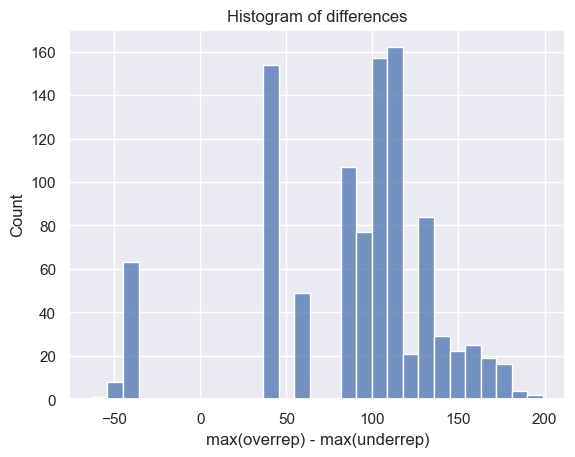

In [122]:
fig, ax = plt.subplots(1, 1, dpi=100)
sns.histplot(diffs, ax=ax).set(title="Histogram of differences", xlabel="max(overrep) - max(underrep)");

# Questions 

Donnez des réponses courtes aux questions suivantes (1-3 lignes chaques).

1. Interprétez les résultats - pouvez-vous tirer une conclusion ? Rappelez-vous que l'affirmation discutée dans l'introduction de cette question était "les hommes sont meilleurs que les femmes aux échecs parce que la plupart des meilleurs joueurs sont des hommes". (Remarque : probablement une partie de votre réponse ici sera liée à votre réponse à la question suivante.)

   
*Les données semblent dire que les deux populations ne suivent pas la meme distribution, et donc que les hommes seraient plus fort que les femmes bien qu'ils soient plus nombreux. Mais...*


2. Pensez-vous que les chiffres obtenus ici racontent toute l'histoire ? Quels pourraient être les problèmes avec l'analyse menée ici ? Les données avec lesquelles nous travaillons sont-elles biaisées d'une quelconque manière (autre qu'un biais de surreprésentation) ? L'ELO est-il une bonne mesure et peut-il être utilisé pour répondre à la question initiale ? Existe-t-il des différences dans le traitement social, culturel et systémique des hommes et des femmes qui peuvent empêcher le groupe sous-représenté d'obtenir des résultats similaires ? Rien d'autre?

*Je ne pense pas que c'est chiffres soient très pertinents, tout d'abord l'ELO n'est pas une bonne mesure. Car aux échecs le gain ou la perte de points ELO dépend de l'écart entre votre classement ELO et celui de votre adversaire, et dans le monde des échecs les femmes ont tendances à plus participé aux tournois féminins (plus accessibles et moins intimidants, car beaucoup de joueuses d'echecs peuvent ressentir une certaine pression a participer aux tournois principaux qui sont principalement composé d'hommes). Et donc comme les joueuses s'affrontent entre elle, elles ont moins d'opportunité de gagner de l'ELO (dut au manque de joueuses et au manque de joueurs aux elo les plus élevés dans ces compétitions). EN plus de celà la moyenne des différences que l'on a remarqué ne me semble pas très significative dans le contexte de L'ELO, par exemple une perte de 88 ELO pour un joueur/se de 2200 ne represente que 4% de perte, ce qui nesemble pas conséquent.*


Le but de ces questions est de souligner que les données sont une représentation limitée du monde réel. Il est essentiel pour nous, en tant que scientifiques des données, de prendre du recul lorsque nous examinons un résultat et de réfléchir à la façon dont il est lié au monde réel, plutôt que de simplement supposer naïvement que les données et la configuration expérimentale sont bonnes, ce qui entraîne souvent des conclusions erronées/incorrectes. Il pourrait y avoir plusieurs facteurs de causalité qui expliquent une relation qui sont indépendants de l'hypothèse d'origine: utilisation de données qui ne reflètent pas vraiment l'hypothèse que vous souhaitez tester, données biaisées (y compris les groupes surreprésentés), différences systémiques réelles entre les groupes, etc.